# Analyzing Walt Disney World Waits - Data Visualization and Analysis

## Importing Our Data

In [60]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import cufflinks as cf
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotly.express as px
sns.set_style('darkgrid')
init_notebook_mode
cf.go_offline
%matplotlib inline
np.set_printoptions(precision=2)

In [2]:
dwarfs = pd.read_csv('dwarfs_clean.csv')
aliens = pd.read_csv('alien_saucers_clean.csv')
dinosaur = pd.read_csv('dinosaur_clean.csv')
everest = pd.read_csv('expedition_everest_clean.csv')
fop = pd.read_csv('flight_of_passage_clean.csv')
safari = pd.read_csv('kilimanjaro_safaris_clean.csv')
river = pd.read_csv('navi_river_clean.csv')
pirates = pd.read_csv('pirates_of_caribbean_clean.csv')
rockcoaster = pd.read_csv('rock_n_rollercoaster_clean.csv')
slinky = pd.read_csv('slinky_dog_clean.csv')
soarin = pd.read_csv('soarin_clean.csv')
spaceship = pd.read_csv('spaceship_earth_clean.csv')
splash = pd.read_csv('splash_mountain_clean.csv')
toystory = pd.read_csv('toy_story_mania_clean.csv')
all_df = pd.read_csv('all_df.csv')
meta = pd.read_csv('metadata.csv')

In [3]:
# Split the rides and their names into parks
mk = [dwarfs, pirates, splash]
mk_names = ['Seven Dwarfs Mine Train', 'Pirates of the Caribbean', 'Splash Mountain']

ep = [soarin, spaceship]
ep_names = ['Soarin', 'Spaceship Earth']

hs = [aliens, rockcoaster, slinky, toystory]
hs_names = ['Alien Swirling Saucers', 'Rock-n-Rollercoaster', 'Slinky Dog Dash', 'Toy Story Midway Mania']

ak = [everest, fop, safari, river]
ak_names = ['Expedition Everest', 'Avatar Flight of Passage', 'Kilimanjaro Safaris', 'Navi River Journey']

all_rides = [dwarfs, pirates, splash, soarin, spaceship, aliens, rockcoaster, slinky,
             toystory, everest, fop, safari, river]
all_ride_names = ['Seven Dwarfs Mine Train', 'Pirates of the Caribbean', 'Splash Mountain', 'Soarin', 'Spaceship Earth',
                 'Alien Swirling Saucers', 'Rock-n-Rollercoaster', 'Slinky Dog Dash', 'Toy Story Midway Mania',
                 'Expedition Everest', 'Avatar Flight of Passage', 'Kilimanjaro Safaris', 'Navi River Journey']

## Mean Waits Overall

In [4]:
df = all_df.copy()
df['date'] = pd.to_datetime(df['date'])
df['datetime'] = pd.to_datetime(df['datetime'])

df_by_day = df.groupby(['date', 'ride']).mean()
df_by_day_park = df.groupby(['date', 'park']).mean()

df_by_month = df.copy()
df_by_month['month'] = df_by_month['date'].dt.month
df_by_month_park = df_by_month.groupby(['month', 'park']).mean()
df_by_month_ride = df_by_month.groupby(['month', 'ride']).mean()

df_by_wd = df.copy()
df_by_wd['weekday'] = df_by_wd['date'].dt.weekday
df_by_wd_park = df_by_wd.groupby(['weekday', 'park']).mean()
df_by_wd_ride = df_by_wd.groupby(['weekday', 'ride']).mean()

df_by_hr = df.copy()
df_by_hr['hour'] = df_by_hr['datetime'].dt.hour
df_by_hr_park = df_by_hr.groupby(['hour', 'park']).mean()
df_by_hr_ride = df_by_hr.groupby(['hour', 'ride']).mean()

Text(0.5, 1.0, 'Mean Wait Time at WDW')

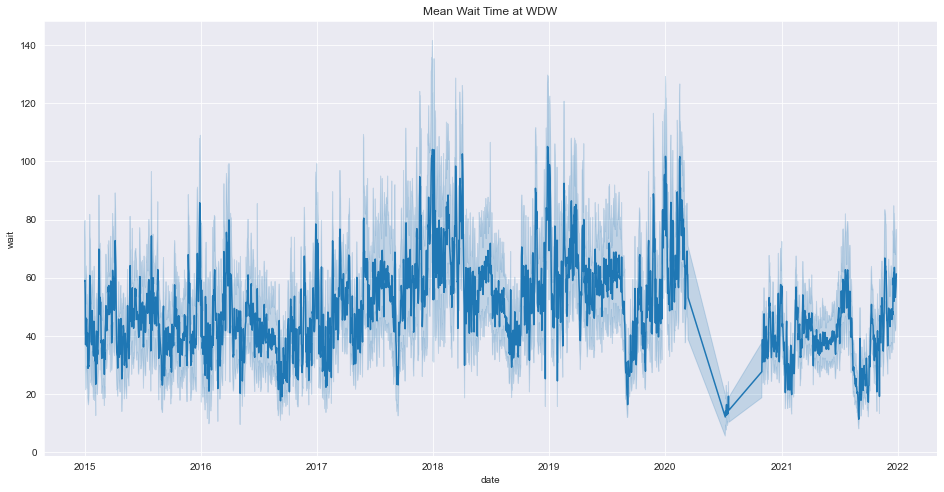

In [13]:
# Resort-wide mean wait time by day
dims = (16, 8)
fig, ax = plt.subplots(figsize=dims)
sns.lineplot(ax=ax, x='date', y='wait', data=df_by_day)
plt.title('Mean Wait Time at WDW')

This is, unsurprisingly, a little hard to parse. We can see some season upticks and downticks from year to year, and most notably a huge drop in early 2020.

Research tells us that the resort was closed to guests starting on [March 15](https://www.cnn.com/2020/03/12/media/disney-world-close-coronavirus/index.html) due to the outbreak of the global COVID-19 pandemic. The resort parks would reopen in [mid-July 2020](https://www.wfla.com/news/florida/magic-kingdom-animal-kingdom-reopen-today-for-first-time-since-march/amp/), operating at 25% capacity and with health measures such as face mask mandates, temperature checks, and limited entertainment. Guest capacity would increase to 35% in [November 2020](https://www.travelweekly.com/North-America-Travel/Increase-in-capacity-at-Disney-World) and saw later increases (not publically specified) in May 2021 after CDC guidelines were relaxed.

With this high-level look aside, can we get a clearer picture when we look at monthly means by park?

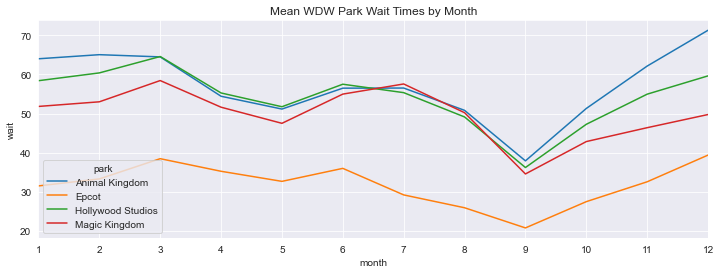

In [14]:
# Park-wide means by month
dims = (12, 4)
fig, ax = plt.subplots(figsize=dims)
sns.lineplot(ax=ax, x='month', y='wait', data=df_by_month_park, hue='park')
plt.xticks([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12])
plt.xlim(1, 12)
plt.title('Mean WDW Park Wait Times by Month')
plt.show()

Much better! Right away we can see a big dip in mean waits across all four parks in September - this makes sense if we think in terms of other families' vacation habits, where most summer-vacation tourists will have headed home and their children will have gone back to school.

This sounds like a good time to think about, but before we drill down on September specific data, let's look at mean waits per ride and weekday.

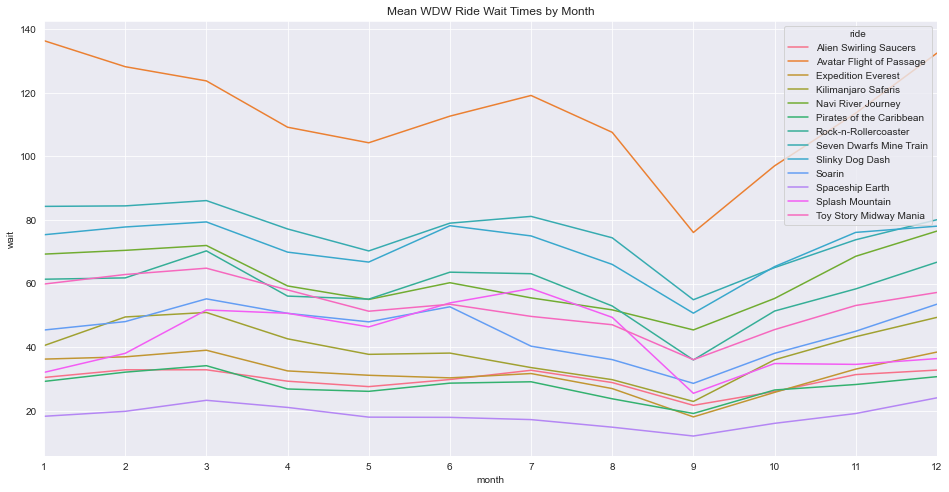

In [15]:
dims = (16, 8)
fig, ax = plt.subplots(figsize=dims)
sns.lineplot(ax=ax, x='month', y='wait', data=df_by_month_ride, hue='ride')
plt.xticks([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12])
plt.xlim(1, 12)
plt.title('Mean WDW Ride Wait Times by Month')
plt.show()

Avatar: Flight of Passage is the clear winner when it comes to the highest mean waits, often more than an hour higher than its closest competitor! Having ridden it myself, I can attest to its major appeal, even for riders who haven't seen the film on which it was based. Next are other (relatively) recently opened and/or highly technical attractions like Slinky Dog Dash and Soarin'.

At the very bottom is Spaceship Earth: an incredibly charming ride to be sure, but also one that opened in [1982](https://en.wikipedia.org/wiki/Spaceship_Earth_(Epcot)) and is (supposed to be) continuously loading, so this too makes sense.

All of our rides of interest display similar dips in September, very encouraging. Let's look at general trends for day of the week and hour of the day.

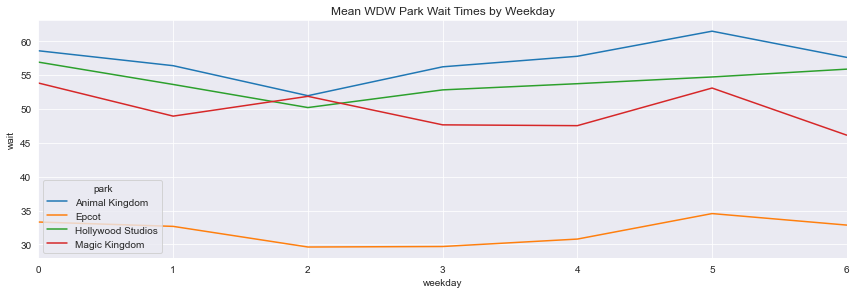

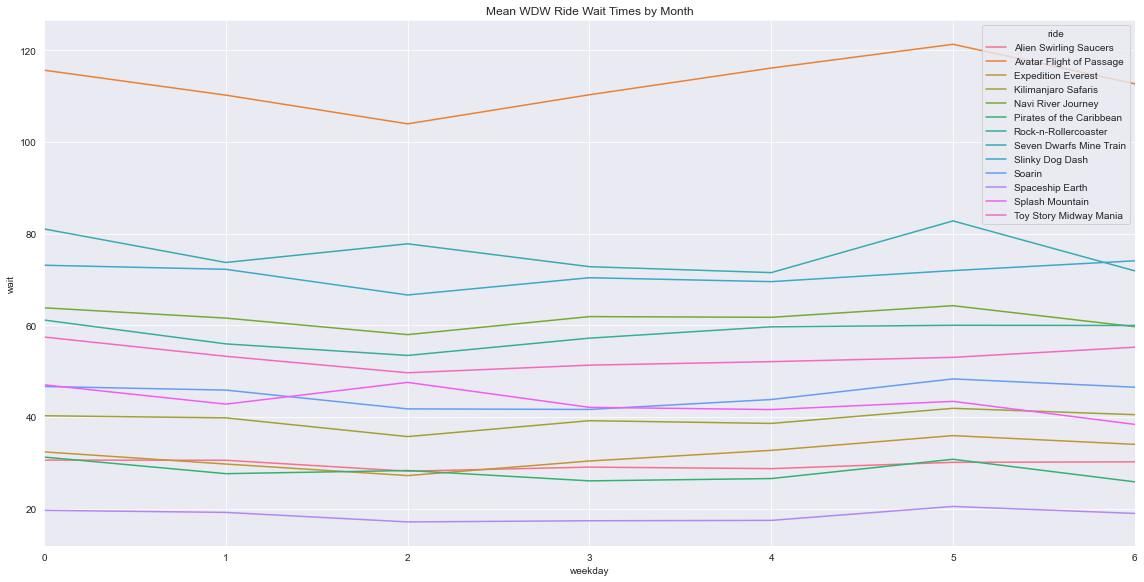

In [18]:
dims = (12, 4)
fig, ax = plt.subplots(figsize=dims)
sns.lineplot(ax=ax, x='weekday', y='wait', data=df_by_wd_park, hue='park')
plt.xlim(0, 6)
plt.tight_layout()
plt.title('Mean WDW Park Wait Times by Weekday')
plt.show()

dims = (16, 8)
fig, ax = plt.subplots(figsize=dims)
sns.lineplot(ax=ax, x='weekday', y='wait', data=df_by_wd_ride, hue='ride')
plt.xlim(0, 6)
plt.tight_layout()
plt.title('Mean WDW Ride Wait Times by Month')
plt.show()

The day of the week doesn't seem to have as high an impact on individual rides' mean wait times, but park to park there is a dip from Monday to Thursday as compared to the weekend. This also makes sense overall; short-term vacationers have gone home, and locals are back at work during the day.

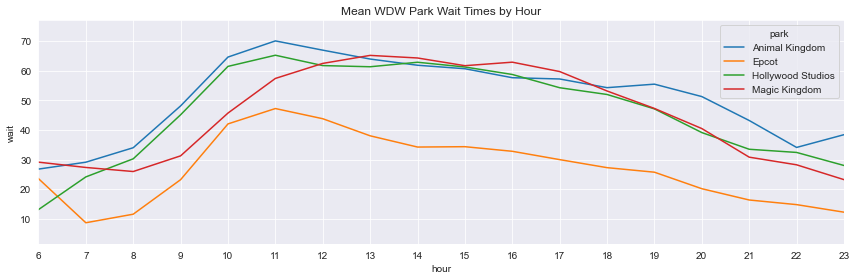

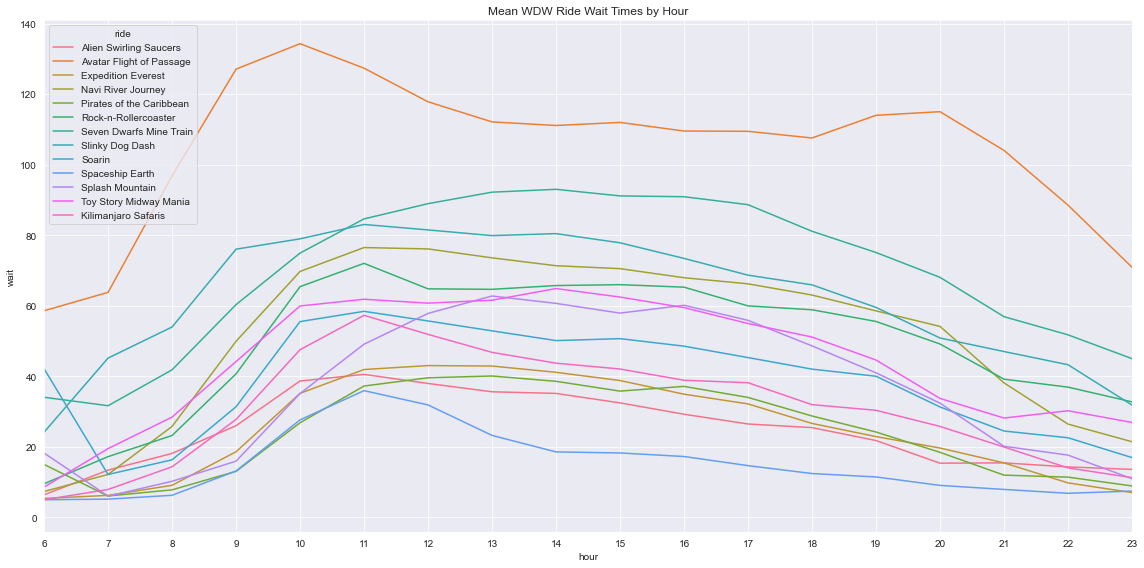

In [23]:
dims = (12, 4)
fig, ax = plt.subplots(figsize=dims)
sns.lineplot(ax=ax, x='hour', y='wait', data=df_by_hr_park, hue='park')
plt.xticks([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23])
plt.xlim(6, 23)
plt.title('Mean WDW Park Wait Times by Hour')
plt.tight_layout()
plt.show()

dims = (16, 8)
fig, ax = plt.subplots(figsize=dims)
sns.lineplot(ax=ax, x='hour', y='wait', data=df_by_hr_ride, hue='ride')
plt.xticks([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23])
plt.xlim(6, 23)
plt.title('Mean WDW Ride Wait Times by Hour')
plt.tight_layout()
plt.show()

Wait times are low in the early hours of park operations then climb steeply later in the morning, then hold in the afternoon and start to decline in the late afternoon and evening.

It seems that, while some visitors will "rope drop" the ride right when the park opens early in the morning, most families on vacation will take time to sleep in a bit, have breakfast, and get small children ready for the day, only entering the park and getting in line for attractions around 10:00. These crowds will remain high, dipping only slightly for lunch or midday breaks, and then decline towards the end of the day (as certain members of the family get tired).

Each park also usually has an evening parade and/or fireworks show that will see crowds forgo rides, in order to get a good viewing spot in the main "hub" of the park.

## Plans for Our Clients

So our findings thus far to recommend to our clients are:
* Vacation in September, after summer vacation crowds have died down
* Visit the parks during the workweek (Monday-Thursday) - if a stay extends through the weekend, it's a good time to relax at the hotel or go shopping at Disney Springs
* Arrive as close to park opening in the morning as possible and prioritize the family's rides first thing; avoid getting in lines at midday, weigh whether they want to see the nighttime entertainment or take advantage of lower waits at night

It would now be extra helpful to give more specific wait times for these target windows to help ensure our customers ride everything they want.

In [31]:
df2 = df.copy()
df2['month'] = df2['date'].dt.month
sep = df2[df2['month'] == 9]
sep['day'] = sep['date'].dt.day

sep_day_ride = sep.groupby(['day', 'ride']).mean()
sep_day_park = sep.groupby(['day', 'park']).mean()

sep_wd = sep.copy()
sep_wd['weekday'] = sep_wd['date'].dt.weekday
sep_wd_park = sep_wd.groupby(['weekday', 'park']).mean()
sep_wd_ride = sep_wd.groupby(['weekday', 'ride']).mean()

sep_hr = sep.copy()
sep_hr['hour'] = sep_hr['datetime'].dt.hour
sep_hr_park = sep_hr.groupby(['hour', 'park']).mean()
sep_hr_ride = sep_hr.groupby(['hour', 'ride']).mean()

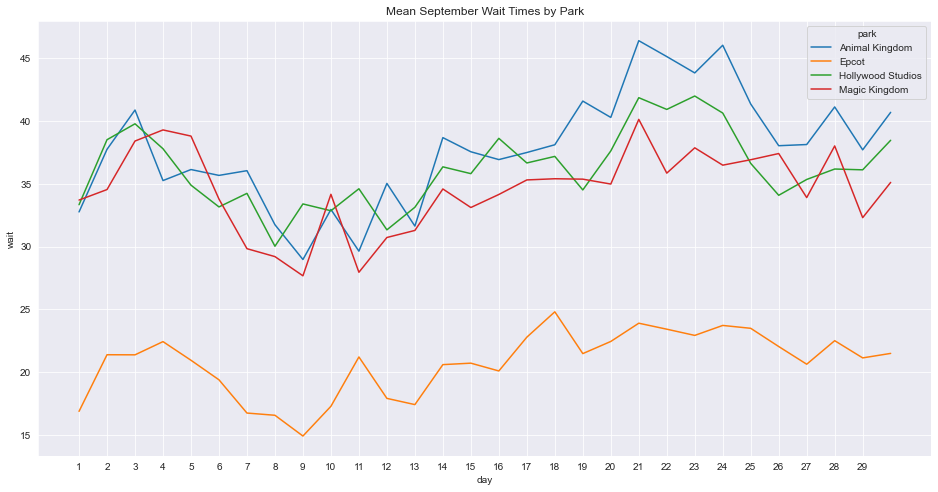

In [38]:
# Resort-wide September mean wait time by day
dims = (16, 8)
fig, ax = plt.subplots(figsize=dims)
sns.lineplot(ax=ax, x='day', y='wait', data=sep_day_park, hue='park')
plt.title('Mean September Wait Times by Park')
plt.xticks(range(1, 30))
plt.show()

The ride data is too busy to draw much conclusion from, but the park-wide means suggest that the real sweet spot is the period between September 5 and 14, typically just after the American Labor Day weekend.

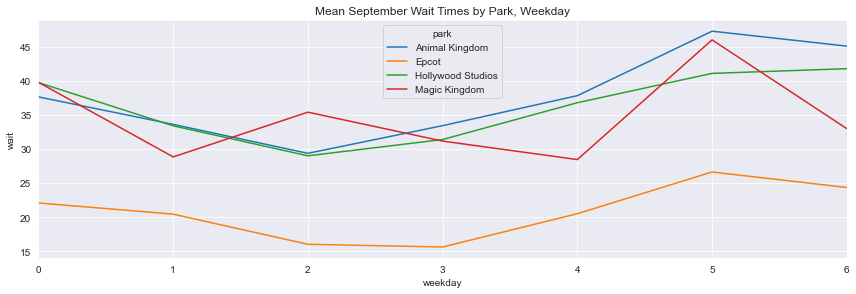

In [37]:
dims = (12, 4)
fig, ax = plt.subplots(figsize=dims)
sns.lineplot(ax=ax, x='weekday', y='wait', data=sep_wd_park, hue='park')
plt.xlim(0, 6)
plt.tight_layout()
plt.title('Mean September Wait Times by Park, Weekday')
plt.show()

Interestingly, Magic Kingdom ticks upward overall on September Tuesdays - so it can be prioritized either on Monday or saved until Thursday.

Animal Kingdom and Hollywood Studios are good choices for Tuesday and Wednesday.

Epcot stays comparably low throughout the week, and can be a good choice for Thursday or Friday.

**Labor Day weekend falls on September 2-5 in 2022 - so to avoid that, we'll tell our customers to arrive in Orlando on the evening of Monday, September 5.**

**Our itinerary suggestions are as follows:**
* **Tuesday, 09/06/22: Animal Kingdom**
* **Wednesday, 09/07/22: Hollywood Studios**
* **Thursday, 09/08/22: Magic Kingdom**
* **Friday, 09/09/22: Epcot**

## What to Expect

In [45]:
df3 = df2.copy()
df3['day'] = df3['date'].dt.day
df3['weekday'] = df3['date'].dt.weekday

In [46]:
df3.head()

,park,ride,date,datetime,wait,month,day,weekday
0,Magic Kingdom,Seven Dwarfs Mine Train,2015-01-01,2015-01-01 07:51:12,45.0,1,1,3
1,Magic Kingdom,Seven Dwarfs Mine Train,2015-01-01,2015-01-01 08:02:13,60.0,1,1,3
2,Magic Kingdom,Seven Dwarfs Mine Train,2015-01-01,2015-01-01 08:05:30,54.0,1,1,3
3,Magic Kingdom,Seven Dwarfs Mine Train,2015-01-01,2015-01-01 08:09:12,60.0,1,1,3
4,Magic Kingdom,Seven Dwarfs Mine Train,2015-01-01,2015-01-01 08:16:12,60.0,1,1,3


In [61]:
def ride_waits(ride, month, weekday, day):
    day_mask = (df3['ride'] == ride) & (df3['month'] == month) & (df3['day'] == day) 
    day_filtered = df3[day_mask]
    
    wd_mask = (df3['ride'] == ride) & (df3['month'] == month) & (df3['weekday'] == weekday)
    wd_filtered = df3[wd_mask]
    
    day_min = day_filtered['wait'].min()
    day_max = day_filtered['wait'].max()
    day_mean = day_filtered['wait'].mean()
    
    wd_min = wd_filtered['wait'].min()
    wd_max = wd_filtered['wait'].max()
    wd_mean = wd_filtered['wait'].mean()
    
    min_avg = (day_min + wd_min) / 2
    max_avg = (day_max + wd_max) / 2
    mean_avg = (day_mean + wd_mean) / 2
    
    print(f'Day minimum, maximum, mean: {day_min}, {day_max}, {day_mean}')
    print(f'Weekday minimum, maximum, mean: {wd_min}, {wd_max}, {wd_mean}')
    print(f'Mixed minimum, maximum, mean: {min_avg}, {max_avg}, {mean_avg}')

In [65]:
for ride in ak_names:
    print(f'{ride}:')
    ride_waits(ride, 9, 2, 6)
    print('\n')

Expedition Everest:
Day minimum, maximum, mean: 2.0, 65.0, 16.428571428571427
Weekday minimum, maximum, mean: 0.0, 80.0, 13.23591421301345
Mixed minimum, maximum, mean: 1.0, 72.5, 14.832242820792437


Avatar Flight of Passage:
Day minimum, maximum, mean: 14.0, 190.0, 80.37160751565762
Weekday minimum, maximum, mean: 3.0, 205.0, 60.41721854304636
Mixed minimum, maximum, mean: 8.5, 197.5, 70.394413029352


Kilimanjaro Safaris:
Day minimum, maximum, mean: 3.0, 110.0, 19.792109256449166
Weekday minimum, maximum, mean: 1.0, 90.0, 16.497816593886462
Mixed minimum, maximum, mean: 2.0, 100.0, 18.144962925167814


Navi River Journey:
Day minimum, maximum, mean: 3.0, 90.0, 38.49892933618844
Weekday minimum, maximum, mean: 0.0, 105.0, 36.38844621513944
Mixed minimum, maximum, mean: 1.5, 97.5, 37.44368777566394




In [66]:
for ride in hs_names:
    print(f'{ride}:')
    ride_waits(ride, 9, 3, 7)
    print('\n')

Alien Swirling Saucers:
Day minimum, maximum, mean: 5.0, 50.0, 20.056818181818183
Weekday minimum, maximum, mean: 3.0, 70.0, 19.35272727272727
Mixed minimum, maximum, mean: 4.0, 60.0, 19.704772727272726


Rock-n-Rollercoaster:
Day minimum, maximum, mean: 3.0, 120.0, 34.600896860986545
Weekday minimum, maximum, mean: 0.0, 120.0, 30.66452050152491
Mixed minimum, maximum, mean: 1.5, 120.0, 32.63270868125573


Slinky Dog Dash:
Day minimum, maximum, mean: 10.0, 90.0, 49.80473372781065
Weekday minimum, maximum, mean: 2.0, 90.0, 46.24941724941725
Mixed minimum, maximum, mean: 6.0, 90.0, 48.027075488613946


Toy Story Midway Mania:
Day minimum, maximum, mean: 3.0, 120.0, 33.537062937062935
Weekday minimum, maximum, mean: 0.0, 115.0, 30.309627329192548
Mixed minimum, maximum, mean: 1.5, 117.5, 31.92334513312774




In [67]:
for ride in mk_names:
    print(f'{ride}:')
    ride_waits(ride, 9, 4, 8)
    print('\n')

Seven Dwarfs Mine Train:
Day minimum, maximum, mean: 5.0, 110.0, 47.790530846484934
Weekday minimum, maximum, mean: 0.0, 150.0, 45.628571428571426
Mixed minimum, maximum, mean: 2.5, 130.0, 46.70955113752818


Pirates of the Caribbean:
Day minimum, maximum, mean: 3.0, 60.0, 17.14527027027027
Weekday minimum, maximum, mean: 1.0, 80.0, 16.4375
Mixed minimum, maximum, mean: 2.0, 70.0, 16.791385135135137


Splash Mountain:
Day minimum, maximum, mean: 0.0, 65.0, 19.533222591362126
Weekday minimum, maximum, mean: 0.0, 65.0, 19.005405405405405
Mixed minimum, maximum, mean: 0.0, 65.0, 19.269313998383765




In [68]:
for ride in ep_names:
    print(f'{ride}:')
    ride_waits(ride, 9, 5, 9)
    print('\n')

Soarin:
Day minimum, maximum, mean: 0.0, 75.0, 20.096126255380202
Weekday minimum, maximum, mean: 1.0, 125.0, 36.83917148949132
Mixed minimum, maximum, mean: 0.5, 100.0, 28.46764887243576


Spaceship Earth:
Day minimum, maximum, mean: 0.0, 35.0, 8.863560732113145
Weekday minimum, maximum, mean: 0.0, 85.0, 15.715494791666666
Mixed minimum, maximum, mean: 0.0, 60.0, 12.289527761889905




## The Plan

**Check in to WDW area hotel on Monday, September 5, 2022. For each day, arrive at your intended park as close to opening time as possible and go to desired rides in this order:**

* **Tuesday, 09/06/22, Animal Kingdom:** Avatar Flight of Passage, Navi River Journey, Kilimanjaro Safaris
* **Wednesday, 09/07/22, Hollywood Studios:** Slinky Dog Dash, ToyStory Midway Mania, Rock-n-Rollercoaster, Alien Swirling Saucers
* **Thursday, 09/08/22, Magic Kingdom:** Seven Dwarfs Mine Train, Splash Mountain, Pirates of the Caribbean
* **Friday, 09/09/22, Epcot:** Soarin', Spaceship Earth

**Once these rides are done, we recommend whatever other rides and attractions appeal to the customers. If possible, we recommend taking a midday break to go back to the hotel to cool off, have lunch, swim, and relax - then return to the park for evening entertainment and any repeat rides that seem appealing!**